vals= [-0.38583062  0.14213424  0.08653986  0.14971239  0.50298062]
L= 2
L= 4
L= 8
L= 16
L= 32
L= 64
L= 128
L= 256


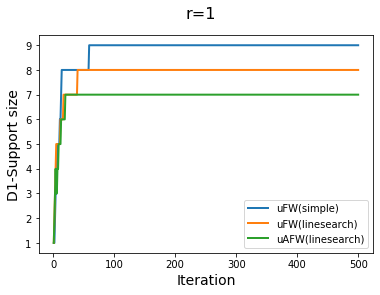

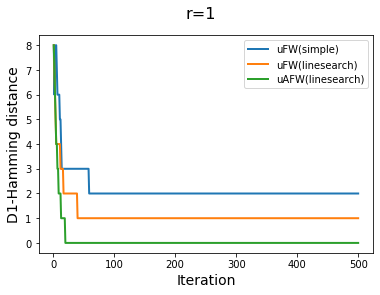

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from Mosek_Leastsquares import *
from uFW_Leastsquares import *
from uAFW_Leastsquares import *
import utils
import uFW_Leastsquares
import uAFW_Leastsquares
import Mosek_Leastsquares
import importlib
importlib.reload(uFW_Leastsquares)
importlib.reload(uAFW_Leastsquares)
importlib.reload(Mosek_Leastsquares)



def my_plotting_LeastSquares(Img_ID, r, N, n, relative_delta, relative_sigma, repeat, myseed, itermax = 2000):
    #####################################################################
    ## Plot the experiments results on trend filtering with quadratic loss.
    ## All the images are saved in a folder named 'Images'.
    ## 
    ##
    ## Input:
    ##
    ## Img_ID: Int
    ## This parameter is used to give different names when saving the images.
    ##
    ## r: The order of difference for D^(r).
    ##
    ## N: The number of samples.
    ##
    ## n: The number of features.
    ##
    ## relative_delta: Relative value w.r.t. the genrated data beforing noising. (See captions of plotted figures in the latex code).
    ##
    ## relative_sigma: Relative noise level (See captions of plotted figures in the latex code).
    ##
    ## repeat: The number of independent experiments.
    ##
    ## itermax: The total number of iterations for each method.
    ##
    ##
    ####################################################################


    if r == 1:
        delta = relative_delta * 1
        piece_type = 'contant'
    else:
        if r == 2:
            delta = relative_delta * 1
            piece_type = 'linear'

    time_vec11_ave, time_vec12_ave, time_vec2_ave = 0,0,0
    relative_gap11_ave, relative_gap12_ave, relative_gap2_ave = 0,0,0
    G_11_ave, G_12_ave, G_2_ave = 0,0,0
    H_11_ave, H_12_ave, H_2_ave = 0,0,0
    
    Hamming11_ave, Hamming12_ave, Hamming2_ave = 0, 0, 0
    sz11_ave, sz12_ave, sz2_ave = 0, 0, 0

    for j in range(repeat):
        m = 5
        A, b, x_true = utils.gen_data_leastsquares(N, n, r, m, relative_sigma, myseed)

        

        ## Output the cpu time and objective values in each iteration for different methods
        time_cvxpy, cvxpy_opt, x_mosek = Mosek_Leastsquares2(r, A, b, delta)
        x_mosek = np.reshape(x_mosek, n)
        if r == 1:
            sp_true = (np.abs(np.diff(x_mosek))>1e-7)*1
        if r == 2:
            sp_true = (np.abs(np.diff(np.diff(x_mosek)))>1e-6)*1


        x11, time_vec11, obj_val11, G_vec11, H_vec11, Z_sp11 = uFW_Leastsquares.uFW_Leastsquares(r, A, b, delta, 'simple', itermax=itermax)
        x12, time_vec12, obj_val12, G_vec12, H_vec12, Z_sp12 = uFW_Leastsquares.uFW_Leastsquares(r, A, b, delta, 'linesearch', itermax=itermax)
        x2, time_vec2, obj_val2, G_vec2, H_vec2, Z_sp2 = uAFW_Leastsquares.uAFW_Leastsquares(r, A, b, delta, itermax=itermax)

        
        sz11 = np.sum(Z_sp11, axis=1)
        sz12 = np.sum(Z_sp12, axis=1)
        sz2 = np.sum(Z_sp2, axis=1)
        Hamming11 = np.sum(np.abs(Z_sp11 - sp_true), axis=1)
        Hamming12 = np.sum(np.abs(Z_sp12 - sp_true), axis=1)
        Hamming2 = np.sum(np.abs(Z_sp2 - sp_true), axis=1)

        
        fig1 = plt.figure()
        x_axis = [i+1 for i in range(itermax)]
        plt.plot(x_axis, sz11, linewidth=2, label='uFW(simple)')
        plt.plot(x_axis, sz12, linewidth=2, label='uFW(linesearch)')
        plt.plot(x_axis, sz2, linewidth=2, label='uAFW(linesearch)')
        plt.legend()
        fig1.suptitle("r=%d" %(r), fontsize=16)
        plt.xlabel('Iteration', fontsize = 14)
        plt.ylabel('D%d-Support size' %(r), fontsize = 14)
#         plt.savefig('Images/Support_size_r=%d.pdf' %(r))
        plt.show()
        
        
        fig2 = plt.figure()
        x_axis = [i+1 for i in range(itermax)]
        plt.plot(x_axis, Hamming11, linewidth=2, label='uFW(simple)')
        plt.plot(x_axis, Hamming12, linewidth=2, label='uFW(linesearch)')
        plt.plot(x_axis, Hamming2, linewidth=2, label='uAFW(linesearch)')
        plt.legend()
        plt.xlabel('Iteration', fontsize = 14)
        plt.ylabel('D%d-Hamming distance' %(r), fontsize = 14)
        fig2.suptitle("r=%d" %(r), fontsize=16)
#         plt.savefig('Images/Support_recovery_Hamming_distance_r=%d.pdf' %(r))
        plt.show()




myseed = 1
my_plotting_LeastSquares(Img_ID= 6, r = 1, N=200, n=200, relative_delta= 1, relative_sigma= np.sqrt(1/1), repeat = 1, myseed=myseed, itermax = 500)

